## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

salaries = pd.read_csv('salaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [214]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


In [215]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,57194.000000,5.719400e+04,57194.000000,57194.000000
mean,2023.776305,1.641818e+05,159223.565829,22.211246
std,0.519883,2.060327e+05,72155.164297,41.424262
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.094000e+05,109300.000000,0.000000
50%,2024.000000,1.495520e+05,149040.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [216]:
cols=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

for col in cols:
    print(col+":")
    print(salaries[col].unique())

experience_level:
['MI' 'EN' 'SE' 'EX']
employment_type:
['FT' 'PT' 'CT' 'FL']
job_title:
['Developer' 'Research Scientist' 'Software Engineer' 'Solution Architect'
 'Manager' 'Data Engineer' 'Analyst' 'Engineering Manager' 'Engineer'
 'Machine Learning Engineer' 'Data Reporting Analyst' 'Data Analyst'
 'Data Scientist' 'Business Intelligence Developer' 'Product Manager'
 'Platform Engineer' 'Cloud Database Administrator'
 'Data Visualization Specialist' 'Analytics Engineer' 'Associate'
 'Software Developer' 'Technical Writer' 'Solutions Architect'
 'Director of Machine Learning' 'Computational Biologist'
 'Applied Scientist' 'Research Engineer' 'Robotics Engineer' 'AI Engineer'
 'Data Architect' 'Computer Vision Engineer' 'Consultant'
 'Data Management Analyst' 'Data Operations Manager'
 'Data Operations Analyst' 'Data Modeler' 'Full Stack Engineer'
 'DevOps Engineer' 'Solutions Engineer' 'Business Analyst'
 'Data Visualization Engineer' 'BI Developer' 'Data Operations Engineer'
 'Dat

There are no missing data or any part to clean. Data is Clean.

In [217]:
cols = ['work_year', 'experience_level', 'employment_type','remote_ratio',  'company_size']

for col in cols:
    print(f"Value counts for {col}:")
    print(salaries[col].value_counts())
    print()

Value counts for work_year:
work_year
2024    46720
2023     8522
2022     1659
2021      218
2020       75
Name: count, dtype: int64

Value counts for experience_level:
experience_level
SE    33865
MI    16900
EN     5233
EX     1196
Name: count, dtype: int64

Value counts for employment_type:
employment_type
FT    56975
PT      113
CT       90
FL       16
Name: count, dtype: int64

Value counts for remote_ratio:
remote_ratio
0      44355
100    12568
50       271
Name: count, dtype: int64

Value counts for company_size:
company_size
M    55025
L     1965
S      204
Name: count, dtype: int64



Dataset contains most data of 2024 - work year, Senior Level - Experience Level, Fill Time - Employment Type, In-Person roles and Medium size companies.

# Question 1:
How many records are in the dataset, and what is the range of years covered?

In [218]:
salaries.shape

(57194, 11)

There are 57194 rows and 11 columns in the dataset.

In [219]:
salaries['work_year'].unique()

array([2024, 2022, 2023, 2020, 2021])

2020 to 2024 are the years in dataset.

# Question 2:

What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?

In [220]:
q2 = salaries[salaries['job_title'].str.contains("^Data Scientist$|^Data Engineer$",case=False)]
q2.groupby('job_title')['salary_in_usd'].mean().round(2)

job_title
Data Engineer     149315.00
Data Scientist    159397.07
Name: salary_in_usd, dtype: float64

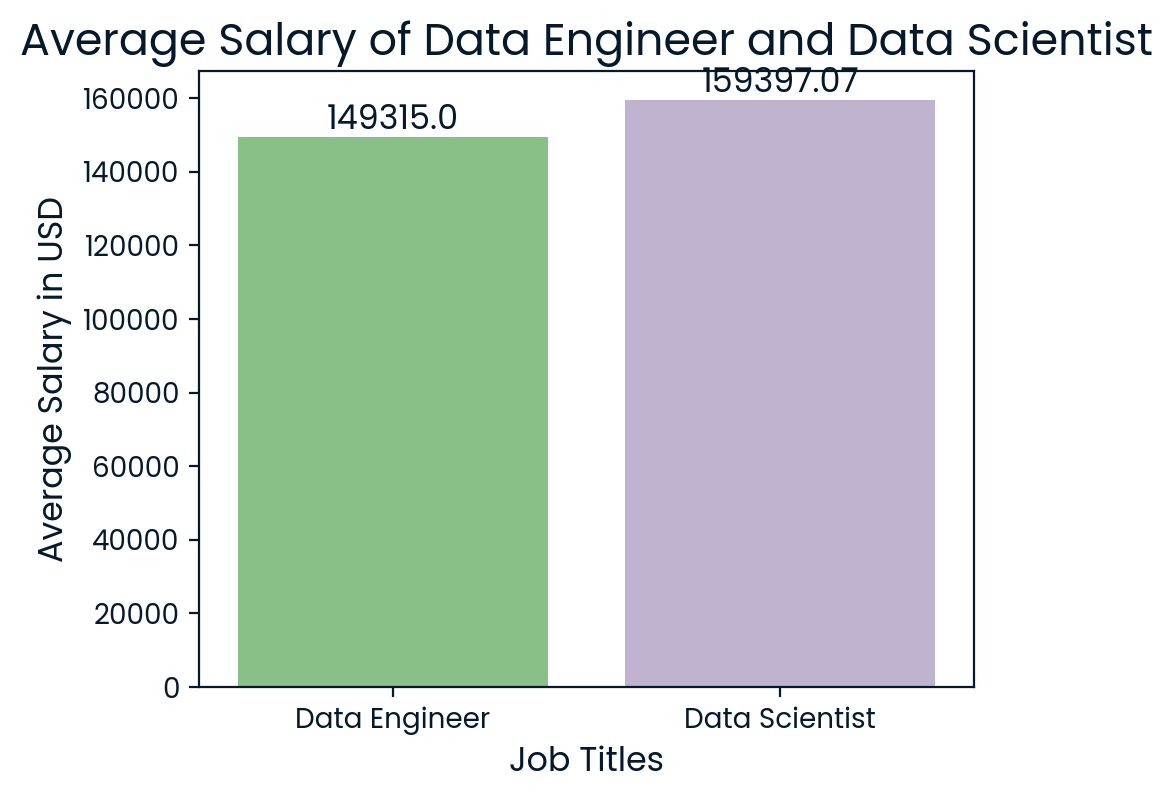

In [221]:
q2 = q2.groupby('job_title')['salary_in_usd'].mean().round(2)
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=q2.index, y=q2.values, palette='Accent')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary of Data Engineer and Data Scientist', fontsize=16)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

Average salary of Data Scientist is 159397.07 and Data Engineer is $149315

In [222]:
q2a = salaries.groupby('job_title')['salary_in_usd'].mean().round(2)
avg = salaries['salary_in_usd'].mean()
titles = q2a > avg
q2a[titles].index

Index(['AI Architect', 'AI Developer', 'AI Engineer', 'AI Product Manager',
       'AI Researcher', 'AI Solution Architect', 'AI Specialist',
       'AWS Data Architect', 'Analytics Engineering Manager',
       'Applied AI ML Lead', 'Applied Scientist', 'Backend Engineer',
       'Cloud Data Architect', 'Cloud Developer', 'Computer Vision Engineer',
       'Data Analytics Lead', 'Data Analytics Team Lead', 'Data Architect',
       'Data Governance Lead', 'Data Infrastructure Engineer',
       'Data Pipeline Engineer', 'Data Platform Engineer',
       'Data Science Tech Lead', 'Data Scientist', 'Databricks Engineer',
       'Deep Learning Engineer', 'Director of Business Intelligence',
       'Director of Machine Learning', 'Engineer', 'Engineering Manager',
       'Frontend Engineer', 'Full Stack Engineer', 'Fullstack Engineer',
       'Head of AI', 'Head of Data', 'Head of Machine Learning',
       'Infrastructure Engineer', 'Lead Engineer',
       'ML Infrastructure Engineer', 'MLOps

These are Job Titles who earn more than average.

'AI Architect', 'AI Developer', 'AI Engineer', 'AI Product Manager', 'AI Researcher', 'AI Solution Architect', 'AI Specialist', 'AWS Data Architect', 'Analytics Engineering Manager', 'Applied AI ML Lead', 'Applied Scientist', 'Backend Engineer', 'Cloud Data Architect', 'Cloud Developer', 'Computer Vision Engineer', 'Data Analytics Lead', 'Data Analytics Team Lead', 'Data Architect', 'Data Governance Lead', 'Data Infrastructure Engineer', 'Data Pipeline Engineer', 'Data Platform Engineer', 'Data Science Tech Lead', 'Data Scientist', 'Databricks Engineer', 'Deep Learning Engineer', 'Director of Business Intelligence', 'Director of Machine Learning', 'Engineer', 'Engineering Manager', 'Frontend Engineer', 'Full Stack Engineer', 'Fullstack Engineer', 'Head of AI', 'Head of Data', 'Head of Machine Learning', 'Infrastructure Engineer', 'Lead Engineer', 'ML Infrastructure Engineer', 'MLOps Engineer', 'Machine Learning Architect', 'Machine Learning Engineer','Machine Learning Infrastructure Engineer', 'Machine Learning Lead', 'Machine Learning Manager', 'Machine Learning Model Engineer', 'Machine Learning Modeler', 'Machine Learning Performance Engineer', 'Machine Learning Platform Engineer', 'Machine Learning Quality Engineer', 'Machine Learning Scientist', 'Machine Learning Software Engineer', 'Manager', 'Platform Engineer', 'Principal Application Delivery Consultant', 'Principal Data Scientist', 'Principal Statistical Programmer', 'Product Manager', 'Prompt Engineer', 'Quantitative Researcher', 'Research Engineer', 'Research Scientist', 'Robotics Software Engineer', 'Security Engineer', 'Site Reliability Engineer', 'Software Development Engineer', 'Software Engineer', 'Solution Architect', 'Solution Engineer', 'Solutions Architect', 'Solutions Engineer', 'Staff Machine Learning Engineer', 'Systems Engineer', 'Technical Lead', 'Technical Specialist'

# Question 3:

How many full-time employees based in the US work 100% remotely?

In [223]:
q3 = salaries[(salaries['employment_type'].str.contains("FT",case=False)) 
              & (salaries['employee_residence'].str.contains("US",case=False)) 
              & (salaries['remote_ratio'] == 100)]
q3.shape

(11125, 11)

There are 11125 people working in US 100% remotely and are Full Time employee.

# Exploratory Data Analysis

### Based on salary_in_usd.

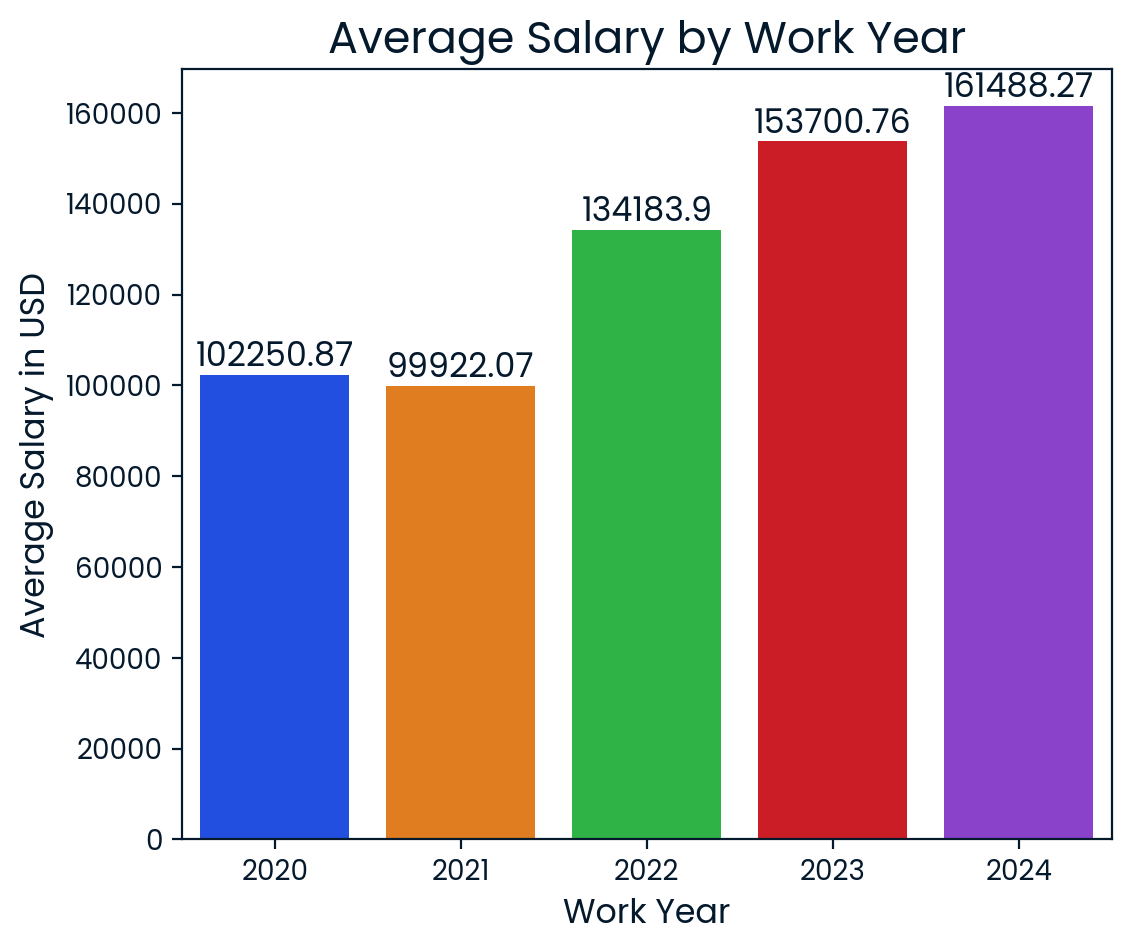

In [224]:
average_salary_by_year = salaries.groupby('work_year')['salary_in_usd'].mean().round(2)

plt.figure(figsize=(6, 5))
ax = sns.barplot(x=average_salary_by_year.index, y=average_salary_by_year.values, palette='bright')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary by Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

Average Salary has increased over the time only exception was in 2021.

### Based on Experience Level

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

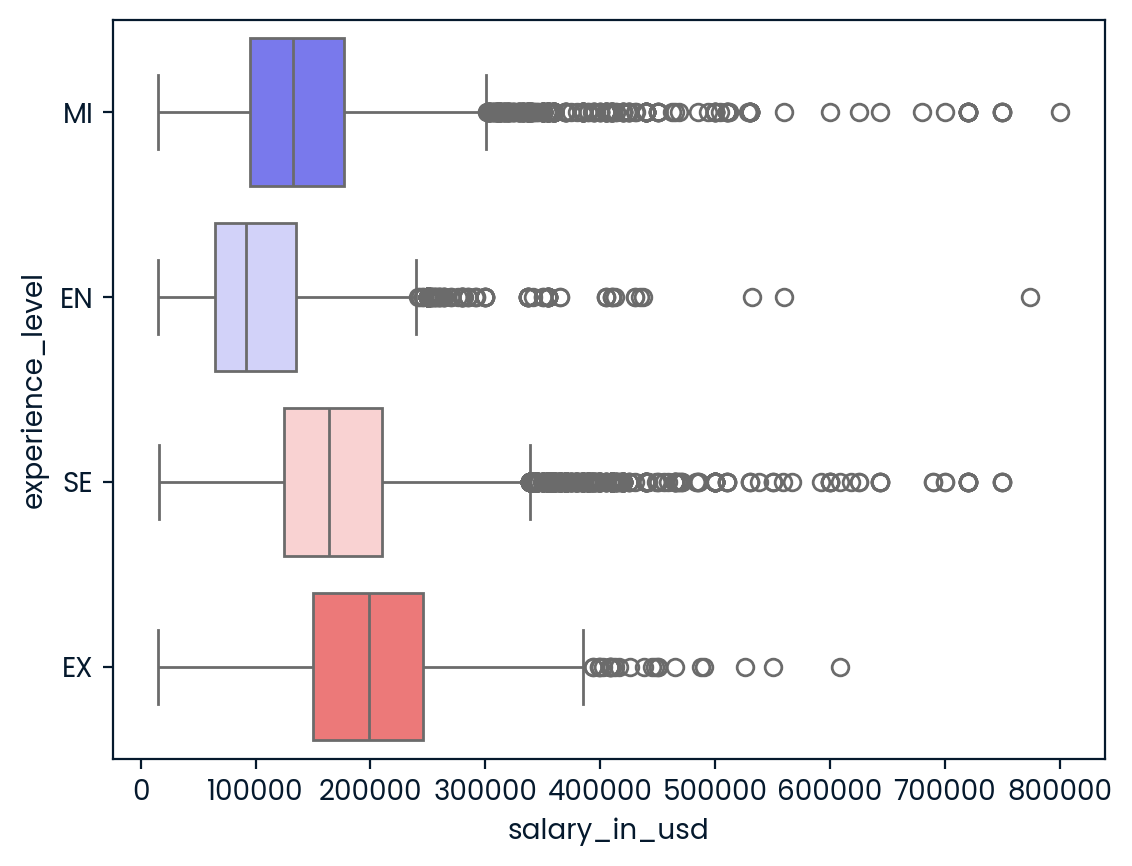

In [225]:
sns.boxplot(x='salary_in_usd', y='experience_level',data=salaries,palette='bwr')

Salary increase from Entry to Middle to Senior to Executive levels.

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

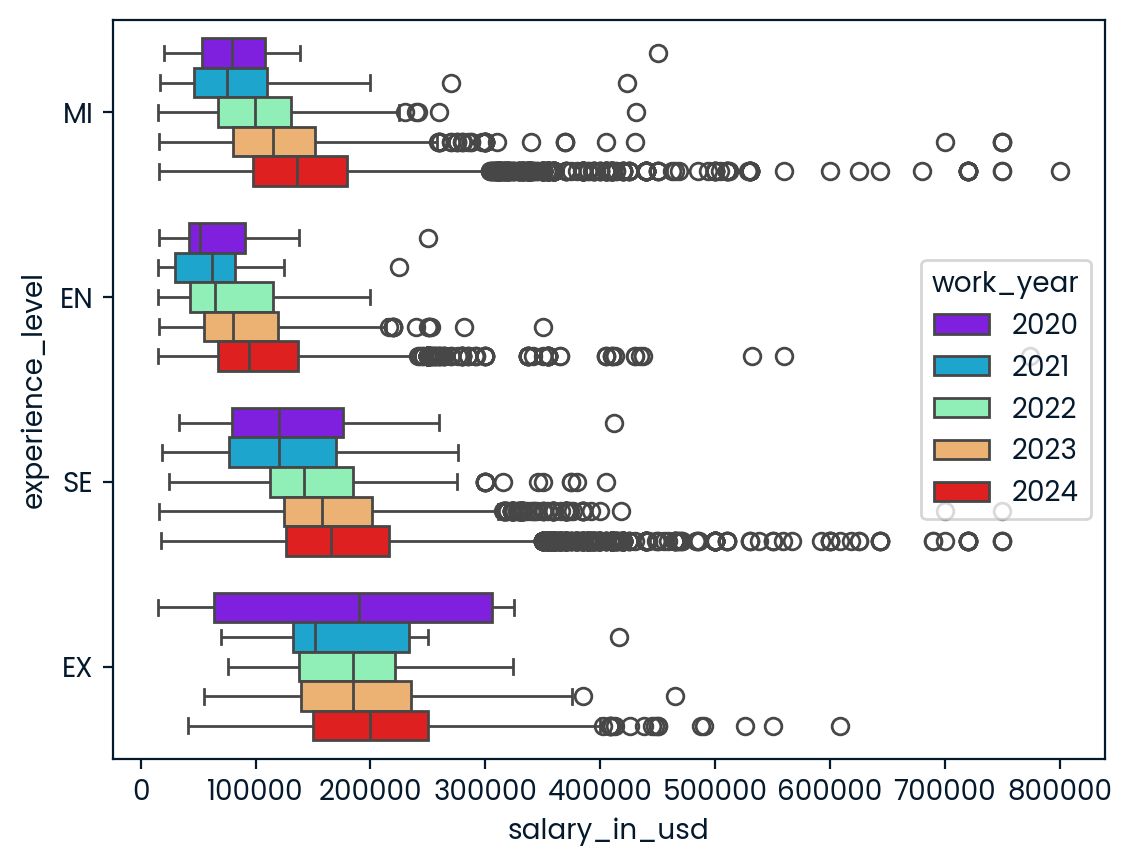

In [226]:
sns.boxplot(hue='work_year', x='salary_in_usd',y='experience_level',data=salaries,palette='rainbow')

For all levels of experience except Executives, average salary has fallen in year 2021 but then increase with time.

### Based on Specific Job Title(if needed)

In [227]:
#salaries = salaries[salaries['job_title'].str.contains("Software",case=False)]

In [228]:
#salaries.pivot_table(values="salary_in_usd", index="work_year",columns="job_title").round(2)
#salaries.pivot_table(values="salary_in_usd", index="experience_level",columns="job_title").round(2)
#salaries.pivot_table(values="salary_in_usd", index="employment_type",columns="job_title").round(2)
#salaries.pivot_table(values="salary_in_usd", index="company_location",columns="job_title").round(2)
#salaries.pivot_table(values="salary_in_usd", index="company_size",columns="job_title").round(2)

You can select specific job role here to get more insights.

### Based on Employment Type

In [229]:
salaries.pivot_table(values="salary_in_usd", index="work_year",columns="employment_type").round(2)

employment_type,CT,FL,FT,PT
work_year,,,,
2020,68251.00,60000.00,106759.81,18817.50
2021,263666.67,41851.67,99485.74,43355.75
2022,69545.25,70130.75,134714.24,74578.83
2023,99314.40,39250.00,153848.12,69820.00
2024,104436.86,46836.75,161740.16,87276.03


In [230]:
a = salaries[(salaries['employment_type'].str.contains("CT", case=False)) & (salaries['work_year'] == 2021)]
a

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
56989,2021,MI,CT,Machine Learning Engineer,270000,USD,270000,US,100,US,L
57079,2021,SE,CT,Staff Data Scientist,105000,USD,105000,US,100,US,M
57121,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


Full Time role has an average salary more than other type of role and in year 2021 is where salary has decreases but later on with time it has increased.
(Contract Level has average 263666.67 as average salary because one of them was Executive.Only three are avaiable in this)

<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

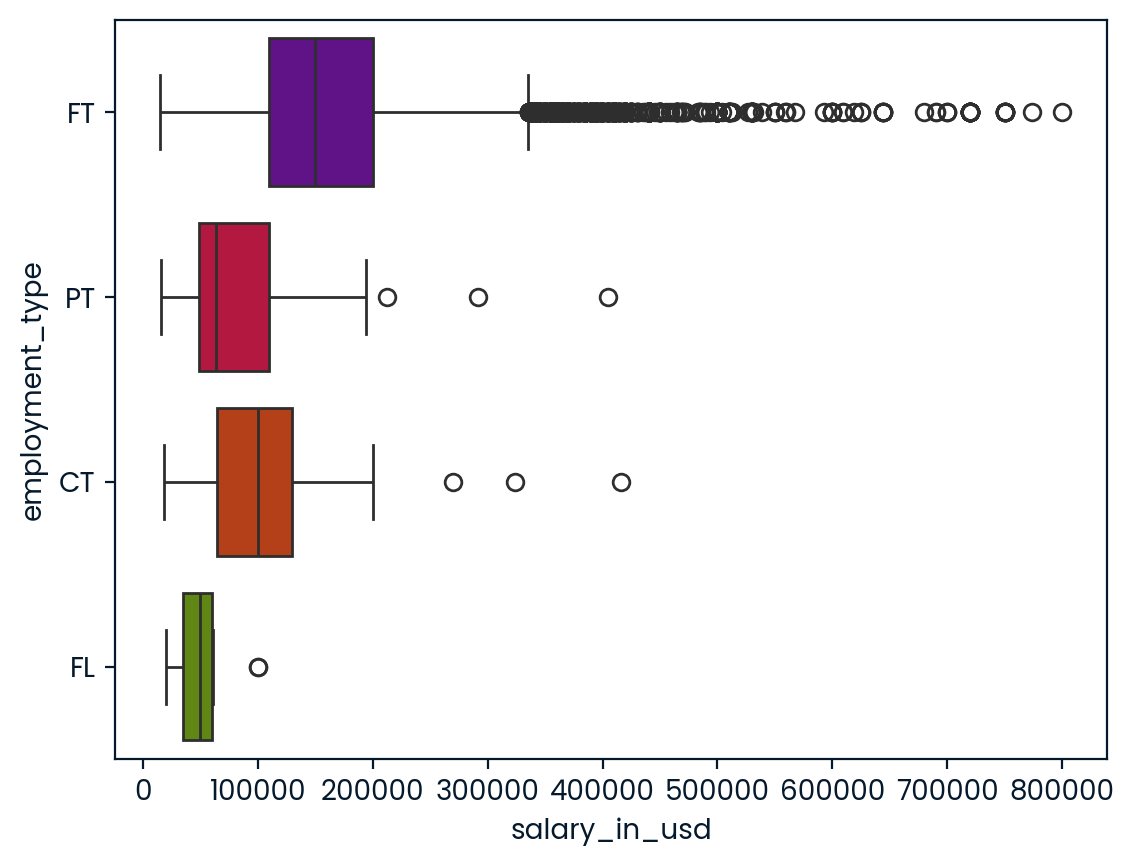

In [231]:
sns.boxplot(x='salary_in_usd', y='employment_type',data=salaries,palette='brg')

Average Salary of Full Time workers are most while freelancer has least.

### Based on Company Location

In [232]:
salaries.pivot_table(values="salary_in_usd", index="work_year",columns="company_location").round(2)

company_location,AD,AE,AM,AR,AS,AT,AU,BA,BE,BG,BR,BS,CA,CF,CH,CL,CN,CO,CY,CZ,DE,DK,DZ,EC,EE,EG,ES,FI,FR,GB,GH,GI,GR,HK,HN,HR,HU,ID,IE,IL,...,IR,IT,JP,KE,KR,LB,LT,LU,LV,MD,MT,MU,MX,MY,NG,NL,NO,NZ,OM,PH,PK,PL,PR,PT,QA,RO,RS,RU,SA,SE,SG,SI,SK,TH,TR,UA,US,VE,VN,ZA
work_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,NaN,115000.0,NaN,NaN,NaN,82683.50,NaN,NaN,NaN,NaN,NaN,NaN,58952.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64749.75,45896.00,NaN,NaN,NaN,NaN,59304.50,NaN,50066.40,103225.25,NaN,NaN,47899.00,NaN,20000.0,45618.0,35735.0,NaN,NaN,NaN,...,NaN,21669.00,150844.50,NaN,NaN,NaN,NaN,62726.0,NaN,NaN,NaN,100000.0,33511.00,NaN,60000.0,42000.00,NaN,125000.00,NaN,NaN,NaN,NaN,NaN,36494.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147167.82,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,18053.0,61467.00,58539.00,NaN,85699.00,NaN,21453.50,45555.0,108410.55,NaN,NaN,40038.0,100000.0,21844.00,NaN,69999.0,85700.81,45445.33,NaN,NaN,NaN,NaN,51331.40,NaN,63072.67,79003.53,30000.0,NaN,40189.00,NaN,NaN,NaN,NaN,NaN,NaN,119059.00,...,NaN,51064.00,95768.75,NaN,NaN,NaN,NaN,59102.0,NaN,18000.0,28369.0,NaN,NaN,NaN,55000.0,57566.00,NaN,NaN,NaN,50000.00,NaN,76246.67,NaN,60757.00,NaN,60000.0,NaN,157500.00,NaN,NaN,78132.0,63831.0,NaN,15000.0,24093.50,NaN,138721.51,NaN,NaN,NaN
2022,NaN,92500.0,NaN,50000.00,55000.0,67098.33,88339.00,NaN,68030.50,NaN,59533.78,NaN,126009.55,NaN,93878.33,NaN,NaN,125000.00,NaN,30469.0,70410.84,NaN,100000.0,NaN,31520.00,22800.00,47997.34,63040.00,72684.47,83909.36,15000.0,NaN,56739.09,NaN,NaN,NaN,17684.0,34208.0,115222.67,107093.00,...,100000.0,46229.00,41809.00,NaN,NaN,NaN,94812.00,NaN,NaN,NaN,NaN,NaN,132500.00,40000.0,200000.0,85288.89,NaN,NaN,NaN,NaN,30000.0,53483.67,167500.0,48921.38,NaN,15129.0,NaN,61227.50,NaN,NaN,65257.0,NaN,NaN,NaN,25000.00,NaN,147583.78,NaN,NaN,NaN
2023,50745.0,NaN,50000.00,65000.00,NaN,NaN,157126.39,120000.0,NaN,NaN,63252.57,NaN,150724.14,49216.0,83661.33,NaN,NaN,79928.57,NaN,107968.0,112799.97,64781.00,NaN,16000.0,48393.44,NaN,60327.99,71259.00,97240.82,105370.37,36000.0,79976.0,19434.00,65058.0,NaN,92280.0,43000.0,NaN,108271.14,266468.50,...,NaN,53863.44,160000.00,65000.0,47000.0,NaN,100410.00,21000.0,58626.33,NaN,NaN,NaN,80000.00,NaN,34800.0,73953.30,88462.0,164951.50,46848.0,60226.67,NaN,62935.20,NaN,51521.00,300000.0,46426.0,NaN,36666.67,134999.0,98791.33,46197.0,52364.0,NaN,26957.0,19190.50,121333.33,159563.16,NaN,63000.0,62935.40
2024,NaN,65000.0,57477.67,72259.93,27000.0,67604.76,130262.74,30000.0,152481.17,60000.0,64274.57,NaN,137207.42,NaN,126596.58,75716.0,NaN,65875.00,37777.5,61333.0,123265.88,117647.00,100000.0,NaN,40000.00,141038.24,89400.13,79802.73,94882.74,94321.22,NaN,NaN,35971.75,NaN,79000.0,35386.0,63333.0,NaN,94529.44,124977.33,...,NaN,112342.00,80531.25,49750.0,96352.0,103916.67,57092.53,55555.0,59513.93,NaN,66825.0,NaN,131338.62,NaN,NaN,82446.46,NaN,118743.42,NaN,32021.35,70000.0,89093.69,NaN,65434.07,NaN,41000.0,51000.0,NaN,150000.0,109049.14,128230.5,NaN,58599.64,NaN,80270.88,104247.25,166022.17,192500.0,NaN,67073.44


US people earn most on average.

There are so many country so it is hard to analyze.

We can select specific country to get more insights.

In [233]:
#salaries = salaries[salaries['company_location'].str.contains("US",case=False)]

#salaries.pivot_table(values="salary_in_usd", index="work_year",columns="company_location").round(2)
#salaries.pivot_table(values="salary_in_usd", index="experience_level",columns="company_location").round(2)
#salaries.pivot_table(values="salary_in_usd", index="employment_type",columns="company_location").round(2)
#salaries.pivot_table(values="salary_in_usd", index="company_location",columns="company_location").round(2)
#salaries.pivot_table(values="salary_in_usd", index="company_size",columns="company_location").round(2)

### Based on Company Size

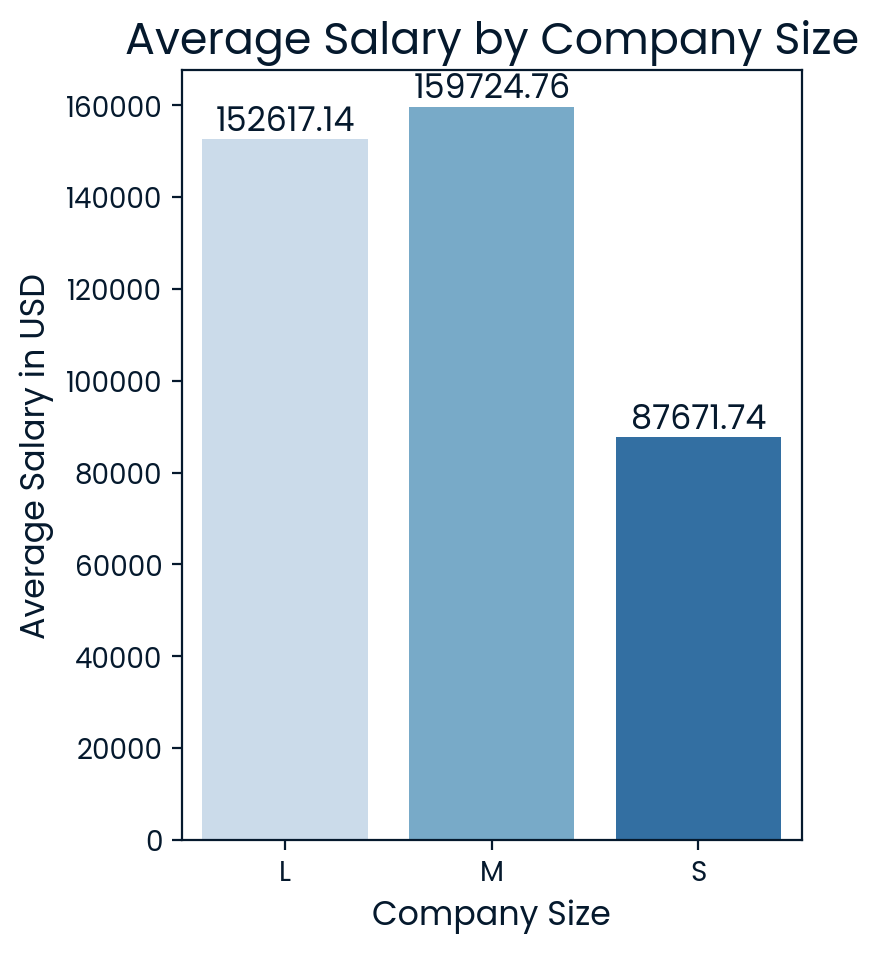

In [234]:
average_salary_by_size = salaries.groupby('company_size')['salary_in_usd'].mean().round(2)

plt.figure(figsize=(4, 5))
ax = sns.barplot(x=average_salary_by_size.index, y=average_salary_by_size.values, palette='Blues')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

People working in Medium size companies earns more than the Large and small size companies.

<Axes: xlabel='salary_in_usd', ylabel='company_size'>

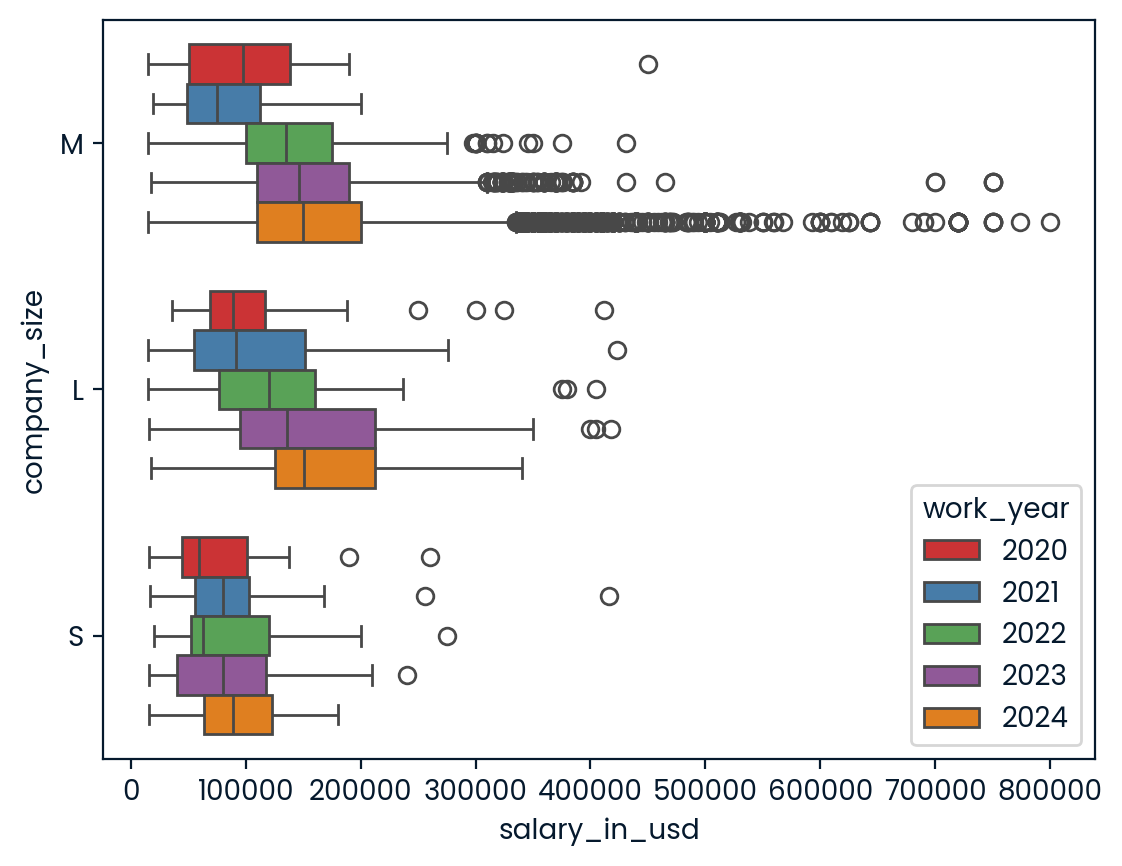

In [235]:
sns.boxplot(hue='work_year', x='salary_in_usd',y='company_size',data=salaries,palette='Set1')

For Large and Medium size company salary has decresed in 2021 while for Small companies it decresed in 2022 and 2023.

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

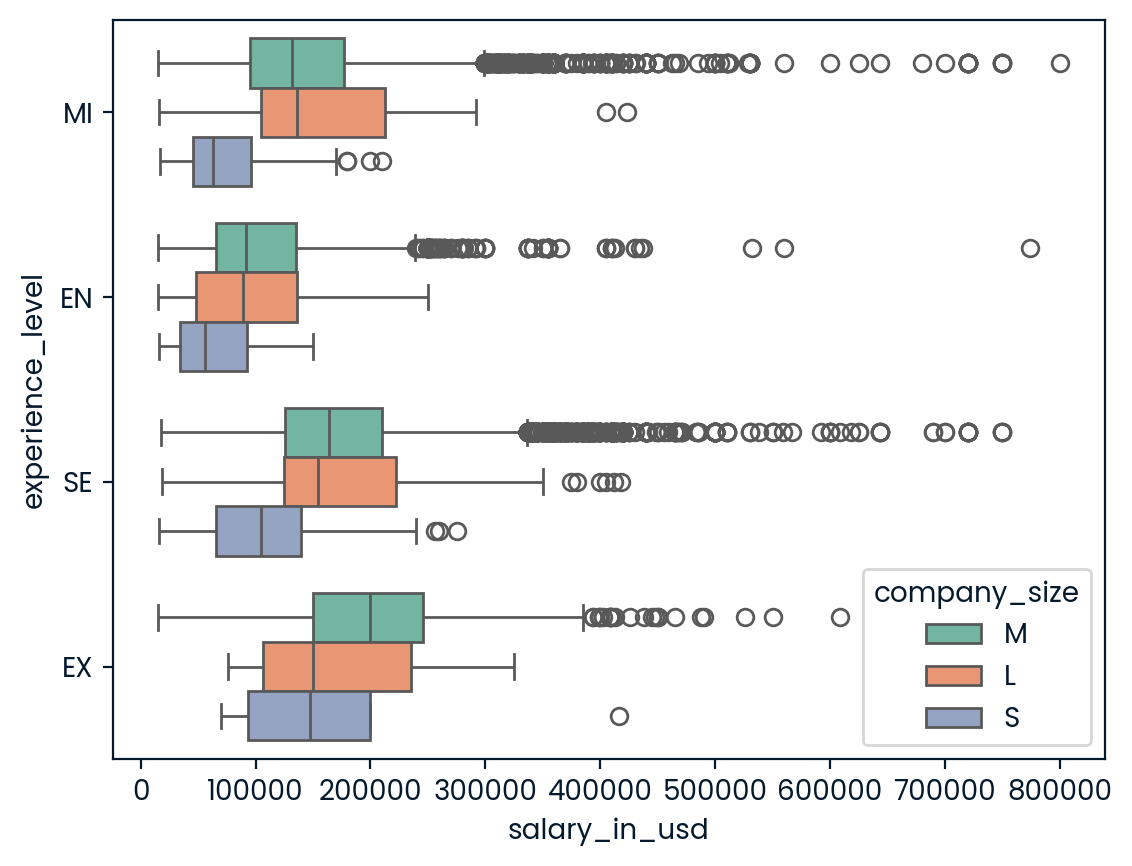

In [236]:
sns.boxplot(y='experience_level', x='salary_in_usd',hue='company_size',data=salaries,palette='Set2')

Small companies has lowest average salary while Medium companies has highest except Middle Level.

In [237]:
salaries.pivot_table(values="salary_in_usd", index="employment_type",columns="company_size").round(2)

company_size,L,M,S
employment_type,,,
CT,109984.57,104105.93,120803.30
FL,20000.00,63841.14,42942.12
FT,153383.36,159934.61,88937.71
PT,64346.92,87609.19,59087.86


Small companies are paying more to Contractual people than other two and more than Full Time.

### Based on Remote Ratio

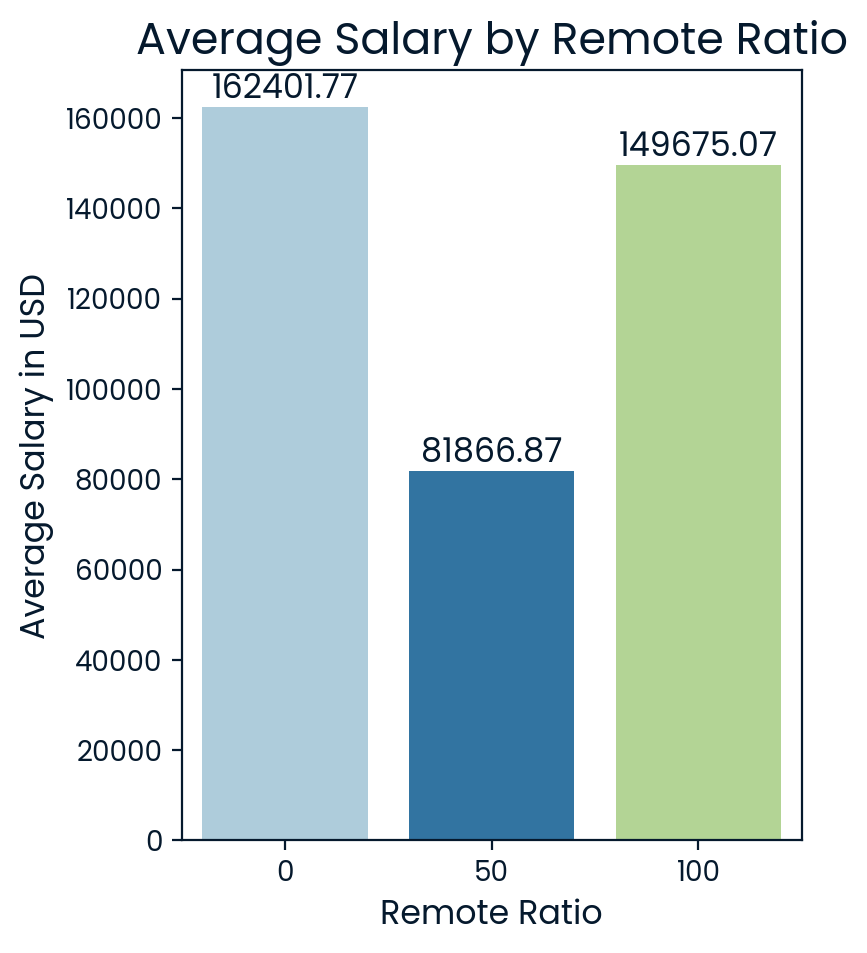

In [238]:
average_salary_by_remote_ratio = salaries.groupby('remote_ratio')['salary_in_usd'].mean().round(2)

plt.figure(figsize=(4, 5))
ax = sns.barplot(x=average_salary_by_remote_ratio.index, y=average_salary_by_remote_ratio.values, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary by Remote Ratio', fontsize=16)
plt.xlabel('Remote Ratio', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

Fully In person roles have more average salary than Hybrid or Remote roles.

In [239]:
salaries.pivot_table(values="salary_in_usd", index="work_year",columns="remote_ratio").round(2)

remote_ratio,0,50,100
work_year,,,
2020,94258.11,86879.14,115214.08
2021,106835.76,81311.82,109905.28
2022,135076.27,83170.71,137093.88
2023,157239.38,79669.34,148079.49
2024,163777.20,82197.05,152078.24


In 2020 to 2022, 100% remote has more average salary than others while in 2023 and 2024, In person roles has more salary than the other.

In [240]:
salaries.pivot_table(values="salary_in_usd", index="employment_type",columns="remote_ratio").round(2)

remote_ratio,0,50,100
employment_type,,,
CT,111804.94,84317.67,100931.30
FL,39111.00,48518.33,54753.70
FT,162585.20,83087.39,150095.22
PT,94706.08,54244.25,60525.71


In person roles are high paying than other for any type of role except Freelance work for 100% remote roles.

In [241]:
salaries.pivot_table(values="salary_in_usd", index="company_size",columns="remote_ratio").round(2)

remote_ratio,0,50,100
company_size,,,
L,167195.57,87021.73,120309.73
M,162305.35,70587.84,151063.09
S,103671.24,77399.78,84319.31


Large companies pays more for In person and Hybrid roles while Medium size companies pay more for remote work.

# Conclusion

Average Salary has increased over the time only exception was in 2021.

Salary of Full Time workers are most while freelancer has least.

People working in Medium size companies earns more than the Large and small size companies.

Fully In person roles have more average salary than Hybrid or Remote roles.